# Study on The Insights Data Set


`Imports`


In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("Insights.csv")
df=df.replace(np.NaN,-1)
df=df.drop(["Date","HS Code","Specific Product","Port of Origin","Country of Destination","Port of Destination","Shipment Mode","Invoice Value INR"],axis=1)
list_of_profit=[]
for i in range(len(df)):
    try:
        list_of_profit.append(((float(df['Std Unit Price(USD)'][i])-float(df['Unit Rate In FC'][i]))*(float(df['Value(INR)'][i])/float(df['Value In FC'][i])))*float(df['Qty'][i]))
    except ZeroDivisionError:
        list_of_profit.append(0)
df = df.assign(Profit = list_of_profit)

profit_percentage=[]
for i in range(len(df)):
    try:
        profit_percentage.append((float(df['Profit'][i])/float(df['Value(INR)'][i]))*100)
    except ZeroDivisionError:
        profit_percentage.append(0) 
df = df.assign(Profit_Percent = profit_percentage)
df.head()

,Product,Value(USD),Std Qty,Std Unit,Std Unit Price(USD),Qty,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Profit,Profit_Percent
0,LADIES LEATHER HAND BAG 100% COW LEATHER SAC C...,1543.70,86.0,NOS,17.95,86.0,PCS,1543.7,17.95,USD,107981.82,0.000000,0.000000
1,BAG,3074.75,710.0,NOS,4.33,710.0,PCS,3074.3,4.33,USD,215078.96,0.000000,0.000000
2,COW NAPPA LEATHER HAND BAG ORDER NO.2167,2487.49,100.0,NOS,24.87,100.0,PCS,2365.0,23.65,EUR,174000.00,8975.898520,5.158562
3,COW NAPPA LEATHER HAND BAG ORDER NO.2213,1529.66,100.0,NOS,15.30,100.0,PCS,1450.0,14.50,EUR,107000.00,5903.448276,5.517241
4,COW NAPPA LEATHER HAND BAG ORDER NO.1132,2558.97,70.0,NOS,36.56,70.0,PCS,2436.0,34.80,EUR,179000.00,9052.873563,5.057471


In [56]:
column = df["Profit_Percent"]
max_value = column. max() 
print(max_value)
for i in range(len(df)):
    if df['Profit_Percent'][i]==max_value:
        print(i)
# row=1355

#To display in a table format
# display(df.loc[row:row])
df.sort_values(by ='Profit', ascending = 0).head()

16100.0
1355


,Product,Value(USD),Std Qty,Std Unit,Std Unit Price(USD),Qty,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Profit,Profit_Percent
4744,100% ORGANIC FAIR TRADE COTTON WOVEN SHO PPING...,69274.58,110500.0,NOS,0.63,110500.0,PCS,62985.00,0.57,EUR,4890785.25,514819.500000,10.526316
3914,100% ORGANIC COTTON WOVEN DRAWSTRING POU CH BA...,67235.65,103600.0,NOS,0.65,103600.0,PCS,61124.00,0.59,EUR,4719942.40,479994.142373,10.169492
3623,SHOPPING BAGS OF COTTON (WOVEN) FAIRTRAD E COT...,58127.61,60000.0,NOS,0.97,60000.0,PCS,52200.00,0.87,EUR,4095090.00,470700.000000,11.494253
3016,HANDICRAFTS JUTE WOVEN DRAWSTRING BAGS - PRINT...,66167.48,150400.0,NOS,0.44,150400.0,PCS,60160.00,0.40,EUR,4671424.00,467142.400000,10.000000
3370,COTTON HAND BAGS WITH/WITHOUT HANDLES: O RGANI...,60491.43,35001.0,NOS,1.73,35001.0,PCS,54601.56,1.56,EUR,4231375.74,461111.458846,10.897436


In [57]:
df.describe()

,Value(USD),Std Qty,Std Unit Price(USD),Qty,Value In FC,Unit Rate In FC,Value(INR),Profit,Profit_Percent
count,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4.973000e+03,4973.000000,4973.000000
mean,4714.924784,2242.019483,12.565801,2239.850547,4963.664975,21.033149,3.322028e+05,9724.008839,5.380577
std,10476.730273,11619.161903,15.065348,11619.282008,13171.162818,89.982391,7.387739e+05,42880.328250,230.139918
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-502787.500000,-99.310000
25%,420.060000,52.000000,2.370000,52.000000,475.000000,2.450000,2.968594e+04,0.000000,0.000000
50%,1435.000000,190.000000,7.150000,189.000000,1475.600000,7.250000,1.009196e+05,0.000000,0.000000
75%,4180.000000,600.000000,17.870000,600.000000,4137.500000,18.150000,2.944810e+05,7599.898911,10.000000
max,147378.120000,300000.000000,338.310000,300000.000000,510000.000000,2224.000000,1.041963e+07,514819.500000,16100.000000


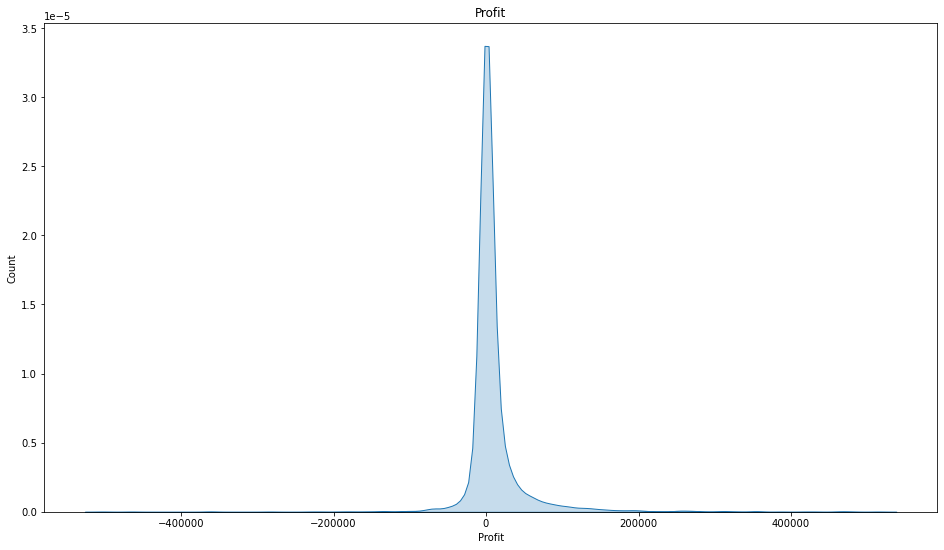

In [59]:
plt.figure(figsize = (16,9))
sns.kdeplot(data= df['Profit'], shade = True)
plt.title("Profit")
plt.xlabel("Profit")
plt.ylabel("Count")

plt.show()